# **Proyek Akhir : Recomendation System**

## Read Data

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# download dataset
import opendatasets as od
import pandas as pd
od.download(
    "https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adestikaningsih
Your Kaggle Key: ··········


100%|██████████| 23.8M/23.8M [00:00<00:00, 60.5MB/s]


In [ ]:
book_dataset = pd.read_csv('/content/book-recommendation-dataset/Books.csv')
rating_dataset = pd.read_csv('/content/book-recommendation-dataset/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Cek jumlah dataset buku
book_dataset.shape

(271360, 8)

In [ ]:
# Cek jumlah dataset rating
rating_dataset.shape

(1149780, 3)

In [ ]:
book_dataset = book_dataset[:10000]
rating_dataset=rating_dataset[:5000]

Berdasarkan jumlah dataset yang sangat banyak maka proyek ini hanya menggunakan 10000 data buku dan 5000 data rating

# Data Understanding

In [ ]:
# melihat dataset buku
book_dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# melihat dataset rating
rating_dataset.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# melihat info dataset buku
book_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 10000 non-null  object
 1   Book-Title           10000 non-null  object
 2   Book-Author          10000 non-null  object
 3   Year-Of-Publication  10000 non-null  object
 4   Publisher            10000 non-null  object
 5   Image-URL-S          10000 non-null  object
 6   Image-URL-M          10000 non-null  object
 7   Image-URL-L          10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
# melihat info dataset buku
rating_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      5000 non-null   int64 
 1   ISBN         5000 non-null   object
 2   Book-Rating  5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


Rename kolom dataset rating dan dataset buku karena nama kolom tersebut berisi spasi, dan huruf kapital sehingga perlu diperbaiki agar mudah digunakan. Berikut kodenya 

In [ ]:
# rename kolom dataset rating
rating_dataset = rating_dataset.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})

In [ ]:
# rename kolom dataset rating
book_dataset = book_dataset.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':
                                            'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})

In [ ]:
# Hapus kolom yang tidak dibutuhkan
book_dataset = book_dataset.drop(columns={'Image_URL_S','Image_URL_M','Image_URL_L'})

In [ ]:
# melihat kembali dataset buku
book_dataset.head()

,ISBN,book_title,book_author,year_of_publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
# melihat kembali dataset rating
rating_dataset.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
!pip install plotly_express 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Top Author
import plotly_express as px
top_author_counts = book_dataset['book_author'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig = px.bar(top_author_counts.tail(50), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig.show()

In [ ]:
# Top Book 

top_book_counts = book_dataset['book_title'].value_counts().reset_index()
top_book_counts.columns = ['value', 'count']
top_book_counts['value'] = top_book_counts['value']
top_book_counts = top_book_counts.sort_values('count')
fig = px.bar(top_book_counts.tail(20), x="count", y="value", title='Top Books', orientation='h', color='value',
             width=1000, height=700)
fig.show()

(1116, 3)
(485, 3)
(631, 3)


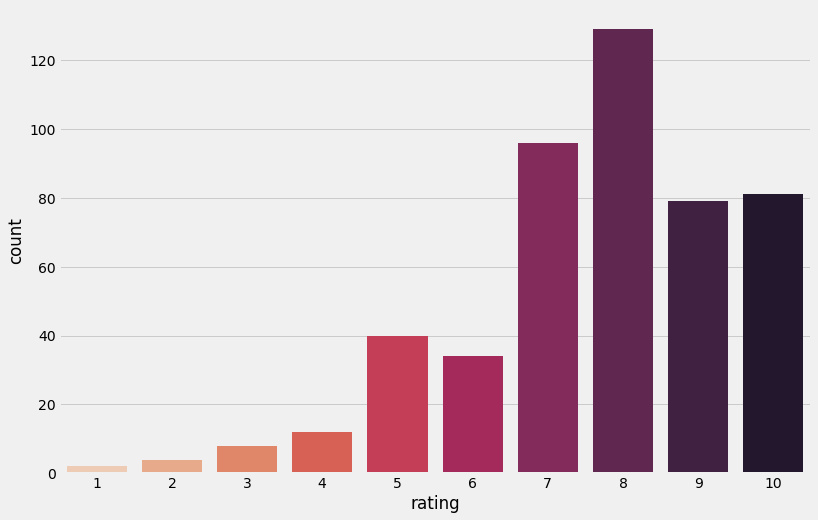

In [ ]:
# memisahkan kumpulan data rating implisit dan eksplisit
ratings_new = rating_dataset[rating_dataset.ISBN.isin(book_dataset.ISBN)]
ratings_explicit = ratings_new[ratings_new['rating'] != 0]
ratings_implicit = ratings_new[ratings_new['rating'] == 0]

import matplotlib.pyplot as plt
import seaborn as sns

print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='rating', palette='rocket_r')

# Data Preparation

In [ ]:
# cek missing value

book_dataset.isnull().sum()

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
Publisher              0
dtype: int64

In [ ]:
# cek missing value

rating_dataset.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

Data Buku dan Rating tidak ada missing value

In [ ]:
# Melihat buku yang di rate 10 
rating_dataset[rating_dataset.rating == max(rating_dataset.rating)]
best_booksId = rating_dataset.ISBN[rating_dataset.rating == max(rating_dataset.rating)]
best_booksId = list(dict.fromkeys(best_booksId))

In [ ]:
best_books = []
for i in best_booksId:
    books_name = book_dataset.book_title[book_dataset.ISBN == i]
    best_books.append(books_name)
len(best_books)

300

Berdasarkan output di atas menunjukkan ada 300 buku yang di rate oleh pengguna.

In [ ]:
# Hapus data duplicate
book_dataset = book_dataset.dropna()
rating_dataset = rating_dataset.dropna()

rating_dataset = rating_dataset.drop_duplicates()
book_dataset = book_dataset.drop_duplicates()

Hapus data duplikat supaya dataset tetap memiliki integritas dan tidak berulang.

In [ ]:
# Mengonversi data series ‘ISBN’ menjadi dalam bentuk list
book_ISBN = book_dataset['ISBN'].tolist()
# Mengonversi data series ‘title’ menjadi dalam bentuk list
book_ISBN = book_dataset['ISBN'].tolist()
# Mengonversi data series ‘author’ menjadi dalam bentuk list
book_author = book_dataset['book_author'].tolist()
# Mengonversi data series ‘year_of_publication’ menjadi dalam bentuk list
book_year_of_publication = book_dataset['year_of_publication'].tolist()

In [ ]:
book_title = book_dataset['book_title'].tolist()

In [ ]:
print(len(book_ISBN))
print(len(book_author))
print(len(book_title))
print(len(book_year_of_publication))

10000
10000
10000
10000


In [ ]:
# Membuat dictionary untuk data 
book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})
book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998
9996,0862418879,The Star Rover,Jack London,2000
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003


Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada data book_title, book_author, ISBN dan book_year_of_publication yang telah kita siapkan sebelumnya.

## Content Based Filtering


Pemfilteran berbasis konten menangani masalah cold-start karena tidak memerlukan data interaksi apa pun untuk menghasilkan rekomendasi. Sebaliknya, ini melihat fitur pengguna (misalnya, usia, jenis kelamin, bahasa lisan, pekerjaan, dll.) dan fitur item (misalnya, genre film, tanggal rilis, pemeran).

In [ ]:
book_dataset.head(5)

,ISBN,book_title,book_author,year_of_publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data author
tf.fit(book['book_author']) 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['aaron',
 'aarsen',
 'abbey',
 'abbott',
 'abby',
 'abelar',
 'abraham',
 'abrahams',
 'abzug',
 'achebe',
 'ackerman',
 'ackroyd',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adamson',
 'addis',
 'adele',
 'adeline',
 'adie',
 'adkins',
 'adler',
 'adrian',
 'adriana',
 'adrienne',
 'africa',
 'agatha',
 'agnes',
 'aguiar',
 'agustã',
 'agut',
 'ahdaf',
 'ahlberg',
 'ahne',
 'aidan',
 'aiden',
 'aiken',
 'aileen',
 'aimee',
 'ainslie',
 'akiba',
 'al',
 'alain',
 'alan',
 'alatas',
 'alba',
 'albanese',
 'albano',
 'albert',
 'alberts',
 'albom',
 'albright',
 'alcock',
 'alcorn',
 'alcott',
 'aldiss',
 'aldous',
 'aldrich',
 'aldrin',
 'alec',
 'aleister',
 'alejandro',
 'alejo',
 'aleksandr',
 'aleramo',
 'alers',
 'alesia',
 'alessandra',
 'alessandro',
 'alex',
 'alexa',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfonsi',
 'alford',
 'alfred',
 'ali',
 'alice',
 'alicia',
 'alien',
 'alighieri',
 'alisa',
 'alison',
 'alistair',
 'alix',
 'aljean',
 'allan',
 'allen',
 'all

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(book['book_author']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(10000, 5575)

Perhatikanlah, matriks yang kita miliki berukuran (10000, 5575). Nilai 10000 merupakan ukuran data dan 5575 merupakan matrik kategori penulis(author)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan judul buku
# Baris diisi dengan nama penulis
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book.book_title).sample(10, axis=1,replace=True).sample(10, axis=0)

,fried,enid,upfield,off,jacobson,rule,darin,tuchman,jenson,alter
book_title,,,,,,,,,,
"Ahab's Wife: Or, The Star-Gazer: A Novel",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Golden Compass (His Dark Materials, Book 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Past Lives, Present Loves",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kate Remembered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
This Present Darkness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Book,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"El Senor De Los Anillos: El Retorno Del Rey (Tolkien, J. R. R. Lord of the Rings. 3.)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Strategic Renewal: Becoming a High-Performance Organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Follow the River,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pada tahap ini telah menghasilkan matriks yang menunjukkan korelasi antara judul buku dengan penulis. Sekarang, kita akan menghitung derajat kesamaan (similarity degree) antar penulis dengan teknik cosine similarity.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['book_title'], columns=book['book_title'])
print('Shape:', cosine_sim_df.shape)
 

Shape: (10000, 10000)


Dengan cosine similarity, kita berhasil mengidentifikasi kesamaan antara satu buku dengan buku lainnya. Shape (10000, 10000) merupakan ukuran matriks similarity dari data yang kita miliki.

Selanjutnya, mari kita lihat matriks kesamaan setiapbbuku dengan menampilkan nama buku dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [ ]:
# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

book_title,Wild Animus,Road Taken,Die Jury. Roman.,Sense and Sensibility (Signet Classic),Help! I'm a Prisoner in the Library
book_title,,,,,
The Great Petrowski: A Fable,0.0,0.0,0.000000,0.0,0.0
"Stop That Eyeball! (Spencer's Adventures, No 1)",0.0,0.0,0.000000,0.0,0.0
Trial by Fire,0.0,0.0,0.000000,0.0,0.0
The World's Stupidest Laws,0.0,0.0,0.000000,0.0,0.0
An Equal Music,0.0,0.0,0.000000,0.0,0.0
Art of Peace (Shambhala Pocket Classics),0.0,0.0,0.278165,0.0,0.0
"Gone, Baby, Gone: A Novel",0.0,0.0,0.000000,0.0,0.0
Fear of Flying,0.0,0.0,0.000000,0.0,0.0
Held Captive : The Kidnapping and Rescue of Elizabeth Smart,0.0,0.0,0.000000,0.0,0.0


In [ ]:
def author_recommendations(i, M, items, k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step) 
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))

# Mengambil data dengan similarity terbesar dari index yang ada    
    closest = M.columns[ix[-1:-(k+2):-1]]

# Drop judulbuku agar judulbuku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Di sini, kita membuat fungsi author_recommendations dengan beberapa parameter sebagai berikut:

- i : Nama penulis (index kemiripan dataframe).
- M: Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘book_title’.
- k : Banyak rekomendasi yang ingin diberikan.

In [ ]:
book_dataset

,ISBN,book_title,book_author,year_of_publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998,William Morrow
9996,0862418879,The Star Rover,Jack London,2000,Canongate Books
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001,LÃ?Â¼bbe
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003,btb


In [ ]:
books_that_have_been_read = "The Diaries of Adam and Eve"
book[book.book_title.eq(books_that_have_been_read)]

,book_ISBN,book_title,book_author,book_year_of_publication
4700,0965881199,The Diaries of Adam and Eve,Mark Twain,1998


In [ ]:
recommendations = author_recommendations(books_that_have_been_read, cosine_sim_df, book[['book_title', 'book_author']])

In [ ]:
recommendations = recommendations.drop_duplicates()

In [ ]:
recommendations

,book_title,book_author
0,ADVENTURES OF HUCKLEBERRY FINN (ENRICHED CLASS...,Mark Twain
1,Adventures of Huckleberry Finn,Mark Twain
2,The Complete Short Stories of Mark Twain (Bant...,Mark Twain
3,Treasury of Illustrated Classics: Adventures o...,Mark Twain
4,A Connecticut Yankee in King Arthur's Court (D...,Mark Twain


In [ ]:
books_that_have_been_read_row = book_dataset[book_dataset.book_title == books_that_have_been_read]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

In [ ]:
books_with_the_same_author = book_dataset[book_dataset.book_author == books_that_have_been_read_author].shape[0]
print(books_with_the_same_author)

16


In [ ]:
Accuracy = (recommendations.shape[0]/books_with_the_same_author)*100
print("Accuracy of the model is {}%".format(Accuracy))

Accuracy of the model is 31.25%


## Model Development dengan Collaborative Filtering

Content Based Filtering didasarkan pada konsep "homophily" — orang yang mirip menyukai hal yang serupa. Tujuannya adalah untuk memprediksi preferensi pengguna berdasarkan umpan balik dari pengguna serupa. Pada proyek ini hanya menggunakan dataset buku.

In [ ]:
# Membaca dataset
 
rating_dataset = rating_dataset
rating_dataset

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
4995,278418,0345309154,0
4996,278418,034530988X,0
4997,278418,0345313860,0
4998,278418,0345314255,0


In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = rating_dataset['user_id'].unique().tolist()
print('list user_id: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list user_id:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = rating_dataset['ISBN'].unique().tolist()
# Melakukan proses encoding bookid
# Melakukan proses encoding angka ke bookid
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [ ]:
# Mapping userID ke dataframe user
# Mapping ISBND ke dataframe BOOK
rating_dataset['user'] = rating_dataset['user_id'].map(user_to_user_encoded)
rating_dataset['book'] = rating_dataset['ISBN'].map(book_to_book_encoded)

In [ ]:
import numpy as np
# Mendapatkan jumlah user
num_users = len(user_encoded_to_user)
print(num_users)
 
# Mendapatkan jumlah BUKU
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
rating_dataset['rating'] = rating_dataset['rating'].values.astype(np.float32)
 
# Nilai minimum rating
# Nilai maksimal rating
min_rating = min(rating_dataset['rating'])
max_rating = max(rating_dataset['rating'])
 
print('Number of User: {}, Number of Buku: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating))

679
4688
Number of User: 679, Number of Buku: 4688, Min Rating: 0.0, Max Rating: 10.0


**Membagi Data untuk Training dan Validasi**

In [ ]:
# Mengacak dataset
rating_dataset = rating_dataset.sample(frac=1, random_state=42)
rating_dataset

,user_id,ISBN,rating,user,book
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = rating_dataset[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = rating_dataset['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 70% data train dan 20% data validasi
train_indices = int(0.70 * rating_dataset.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]


**Proses Training**

Pada tahap ini, kita membuat class RecommenderNet dengan keras Model class.  

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi  
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user

        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)# layer embedding user bias
    self.resto_embedding = layers.Embedding(# layer embeddings buku 
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1)#layer embedding book bias 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])# memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0])# memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1])# memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1])# memanggil layer embedding 4 
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x)# activation sigmoid 

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
700/700 [==============================] - 5s 6ms/step - loss: 0.6705 - root_mean_squared_error: 0.4230 - val_loss: 0.6485 - val_root_mean_squared_error: 0.4141
Epoch 2/20
700/700 [==============================] - 3s 5ms/step - loss: 0.5754 - root_mean_squared_error: 0.3662 - val_loss: 0.6203 - val_root_mean_squared_error: 0.3974
Epoch 3/20
700/700 [==============================] - 4s 5ms/step - loss: 0.5262 - root_mean_squared_error: 0.3409 - val_loss: 0.6055 - val_root_mean_squared_error: 0.3889
Epoch 4/20
700/700 [==============================] - 4s 5ms/step - loss: 0.5054 - root_mean_squared_error: 0.3284 - val_loss: 0.5905 - val_root_mean_squared_error: 0.3806
Epoch 5/20
700/700 [==============================] - 4s 5ms/step - loss: 0.4863 - root_mean_squared_error: 0.3163 - val_loss: 0.5777 - val_root_mean_squared_error: 0.3739
Epoch 6/20
700/700 [==============================] - 3s 5ms/step - loss: 0.4648 - root_mean_squared_error: 0.3033 - val_loss: 0.5676 - val_

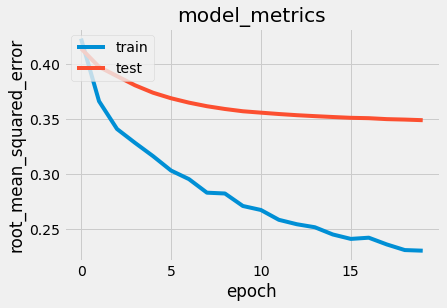

In [ ]:
# Visualisasi Metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Mendapatkan Rekomendasi**

In [ ]:
book_dataset

,ISBN,book_title,book_author,year_of_publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998,William Morrow
9996,0862418879,The Star Rover,Jack London,2000,Canongate Books
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001,LÃ?Â¼bbe
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003,btb


In [ ]:
# Mengambil sample user
user_id = rating_dataset.user_id.sample(1).iloc[0]
books_have_been_read_by_user = rating_dataset[rating_dataset.user_id == user_id]
 
books_have_not_been_read_by_user = book_dataset[book_dataset['ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['ISBN'] 
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)
 
books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

In [ ]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]
 
top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
books_row = book_dataset[book_dataset['ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.book_title, ':', row.book_author)
 
print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)
 
recommended_books = book_dataset[book_dataset['ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

The Pelican Brief : John Grisham
--------------------------------
Top 10 Book Recommendation for user: 277639
--------------------------------
The Funhouse : Dean R. Koontz
A Time to Kill : JOHN GRISHAM
Fear Nothing : DEAN KOONTZ
The Pelican Brief : John Grisham
Violets Are Blue : James Patterson
Dark Rivers of the Heart : Dean R. Koontz
The Client : John Grisham
Fortune's Hand : Belva Plain
Ordinary People : Judith Guest
Four Past Midnight : Stephen King


Sampai di tahap ini, proyek ini telah berhasil membuat sistem rekomendasi dengan dua teknik, yaitu Content based Filtering dan Collaborative Filtering. Sistem rekomendasi yang telah dibuat berhasil memberikan sejumlah rekomendasi buku yang sesuai dengan preferensi pengguna.